# Problem 1
## Part 1
Generate 20 random points in d = 3 from a Gaussian multivariate distribution with mean $[0, 0, 0]$ and cov matrix:
$$\begin{bmatrix}
    0.5 & 0 & 0 \\
    0 & 0.5 & 0 \\
    0 & 0 & 0.7
    \end{bmatrix}$$
    
Call this data label 1. Do the same for another Gaussian with mean $[1, 1, 1]$ and cov matrix:
$$\begin{bmatrix}
    0.5 & 0 & 0 \\
    0 & 0.5 & 0 \\
    0 & 0 & 0.01 
    \end{bmatrix}$$
    
Call this data label 2. Create a 3 d plot of the data points, labeled.

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [18]:
# Define variables

mu_1 = np.zeros(3)
mu_2 = np.ones(3)
var_1 = np.array([0.5, 0.5, 0.7])
var_2 = np.array([0.5, 0.5, 0.01])
cov_1 = np.multiply(np.matlib.eye(3) , var_1)
cov_2 = np.multiply(np.matlib.eye(3), var_2)
print(cov_1)
print(cov_2)

[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.7]]
[[0.5  0.   0.  ]
 [0.   0.5  0.  ]
 [0.   0.   0.01]]


In [33]:
# Sample the two vectors of Gaussians

label_1 = np.random.multivariate_normal(mean=mu_1, cov=cov_1, size=20)
label_2 = np.random.multivariate_normal(mean=mu_2, cov=cov_2, size=20)

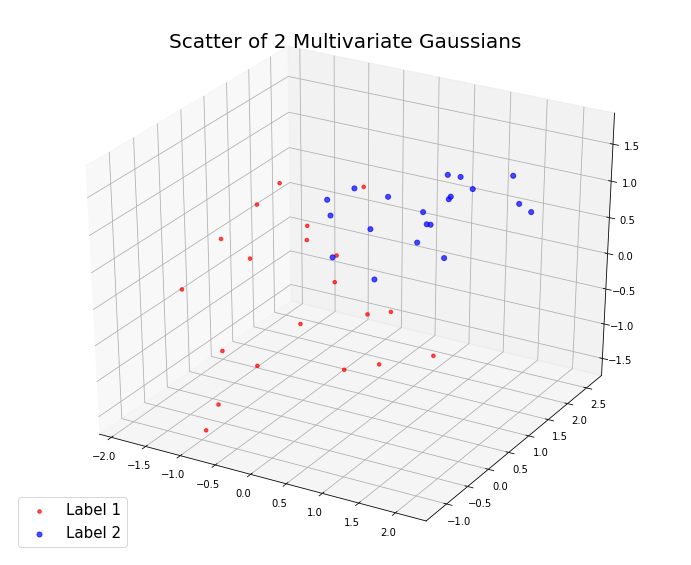

In [77]:
# Why can't python plotting be more like MATLAB plotting :(

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111, projection='3d')
_ = ax1.scatter(label_1[:,0], label_1[:,1], label_1[:,2], 
                alpha=0.7, s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,0], label_2[:,1], label_2[:,2], 
                alpha=0.7, s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians', FontSize=20)
_ = plt.legend(loc=3, prop={'size' : 15})

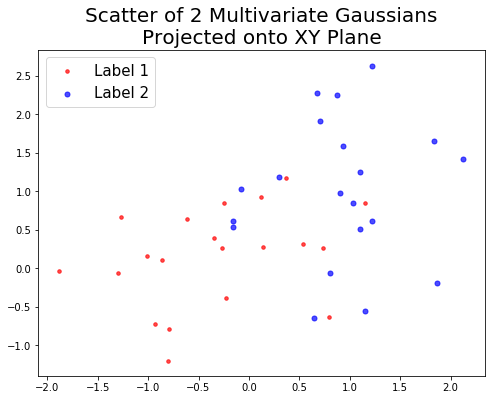

In [85]:
# Projection onto x, y plane

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(label_1[:,0], label_1[:,1], alpha=0.7, 
                s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,0], label_2[:,1], alpha=0.7, 
                s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians\nProjected onto XY Plane', FontSize=20)
_ = plt.legend(loc=2, prop={'size' : 15})

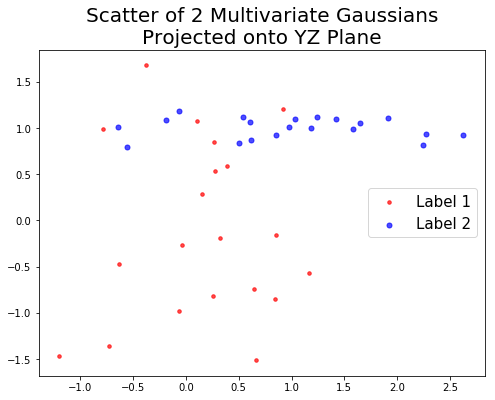

In [86]:
# Projection onto y, z plane

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(label_1[:,1], label_1[:,2], alpha=0.7, 
                s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,1], label_2[:,2], alpha=0.7, 
                s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians\nProjected onto YZ Plane', FontSize=20)
_ = plt.legend(loc=5, prop={'size' : 15})

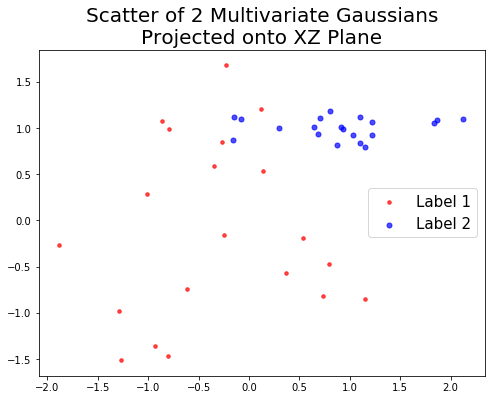

In [87]:
# Projection onto x, z plane

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(label_1[:,0], label_1[:,2], alpha=0.7, 
                s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,0], label_2[:,2], alpha=0.7, 
                s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians\nProjected onto XZ Plane', FontSize=20)
_ = plt.legend(loc=5, prop={'size' : 15})

## Part 2

The points just look like a cloud duh

## Part 3
Concatenate points and find covariance matrix

In [120]:
# Split up the distribution

G = np.vstack((label_1, label_2))
X = G[:,0]
Y = G[:,1]
Z = G[:,2]

In [130]:
# Calculate the covariance matrix by hand

def Cov(x, y):
    return np.dot(x,y)/x.shape
    
mu_1 = (np.sum(X)/X.shape[0])
mu_2 = (np.sum(Y)/Y.shape[0])
mu_3 = (np.sum(Z)/Z.shape[0])
mse_1 = np.subtract(X, mu_1)
mse_2 = np.subtract(Y, mu_2)
mse_3 = np.subtract(Z, mu_3)

means = [mu_1, mu_2, mu_3]
mses = [mse_1, mse_2, mse_3]

cov_matrix = np.zeros((3,3))
for i in range(cov_matrix.shape[0]):
    for j in range(cov_matrix.shape[1]):
        cov_matrix[i,j] = Cov(mses[i], mses[j])

[[0.87175921 0.35305139 0.37221879]
 [0.35305139 0.77161669 0.24472993]
 [0.37221879 0.24472993 0.75189049]]
40


In [133]:
print(cov_matrix)
print(np.cov(G.T))

[[0.87175921 0.35305139 0.37221879]
 [0.35305139 0.77161669 0.24472993]
 [0.37221879 0.24472993 0.75189049]]
[[0.89411201 0.36210399 0.38176286]
 [0.36210399 0.79140173 0.25100506]
 [0.38176286 0.25100506 0.77116974]]


# Part 4
Using $k=2$ Find the two eigenvectors of the covariance matrix with the largest eigenvalues Project the data points onto these two vectors and show the 2d plot.

In [134]:
Lamba, V = np.linalg.eig(cov_matrix)

In [135]:
print(Lamba)

[1.4563724  0.41902916 0.51986482]


In [136]:
# The two largest eigenvalues are 1 and 3, so we grab the two eigenvectors 
# associated with them.
ev_1 = V[:,0]
ev_3 = V[:,2] 



[[ 0.65947628  0.74122887  0.12518306]
 [ 0.53040179 -0.34080882 -0.77622373]
 [ 0.53269595 -0.57829846  0.61790446]]
